In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


In [188]:
train = pd.read_csv('train.csv')


In [189]:
print(train.head())

   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN    

In [190]:

print(train.describe())


                 ID  hla_match_c_high  hla_high_res_8  hla_low_res_6  \
count  28800.000000      24180.000000    22971.000000   25530.000000   
mean   14399.500000          1.764516        6.876801       5.143322   
std     8313.988213          0.431941        1.564313       1.207757   
min        0.000000          0.000000        2.000000       2.000000   
25%     7199.750000          2.000000        6.000000       4.000000   
50%    14399.500000          2.000000        8.000000       6.000000   
75%    21599.250000          2.000000        8.000000       6.000000   
max    28799.000000          2.000000        8.000000       6.000000   

       hla_high_res_6  hla_high_res_10  hla_match_dqb1_high    hla_nmdp_6  \
count    23516.000000     21637.000000         23601.000000  24603.000000   
mean         5.109202         8.617230             1.736876      5.160346   
std          1.214162         1.905125             0.447687      1.203240   
min          0.000000         3.000000     

In [191]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [192]:
print(train.shape) 


(28800, 60)


In [193]:
print(train.columns)   


Index(['ID', 'dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_hi

In [194]:
missing_values =(train.isnull().sum())
missing_percentage = (missing_values / len(train)) * 100


In [195]:
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])


Missing Values in Each Column:
 dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
arrhythmia                 2202
hla_low_res_6              3270
vent_hist                   259
renal_issue                1915
pulm_severe                2135
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
obesity                    1760
mrd_hct                   16597
in_vivo_tcd                 225
tce_match                 18996
hla_match_a_high           4301
hepatic_severe             1871
donor_ag

In [196]:

train.fillna(train.mean(numeric_only=True), inplace=True)


In [197]:
threshold = 50  
cols_to_drop = missing_percentage[missing_percentage > threshold].index
train.drop(columns=cols_to_drop, inplace=True)


In [198]:
print("Missing Values :\n", train.isnull().sum().sum())


Missing Values :
 80215


In [199]:
print(train.isnull().sum())  # missing values per column


ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high              0
hla_high_res_8                0
tbi_status                    0
arrhythmia                 2202
hla_low_res_6                 0
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6                0
cmv_status                  634
hla_high_res_10               0
hla_match_dqb1_high           0
tce_imm_match             11133
hla_nmdp_6                    0
hla_match_c_low               0
rituximab                  2148
hla_match_drb1_low            0
hla_match_dqb1_low            0
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
in_vivo_

In [200]:
print("Missing Values :\n",train.isnull().sum().sum())  


Missing Values :
 80215


In [201]:
train.dropna(inplace=True)


In [202]:
print("Missing Values after handling :\n",train.isnull().sum().sum())  


Missing Values after handling :
 0


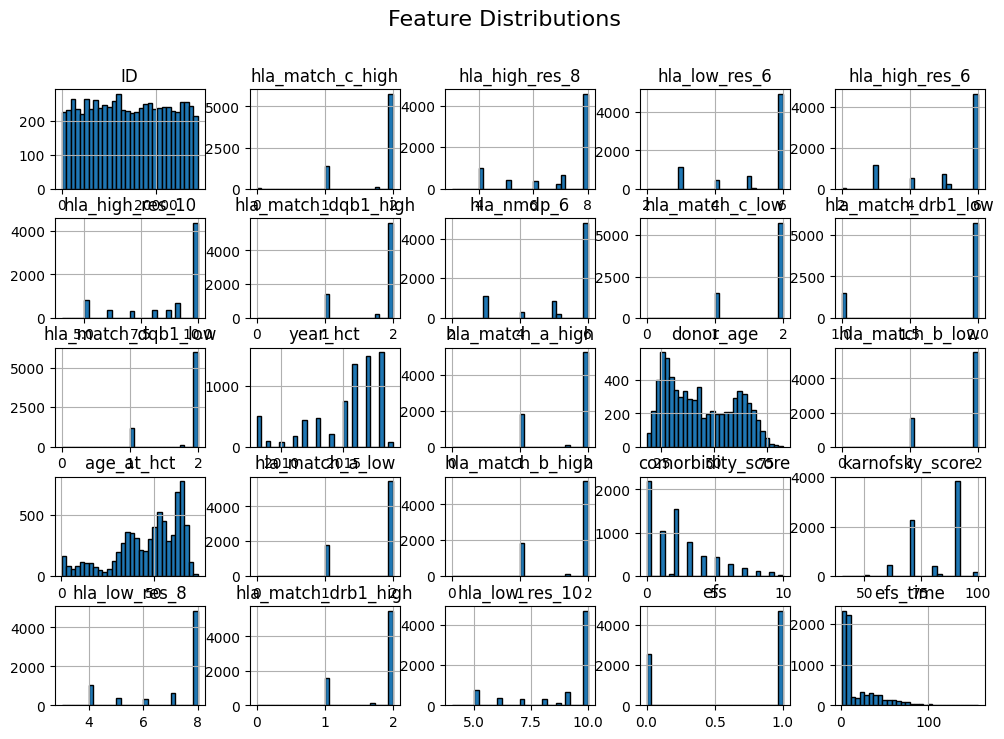

In [203]:
#histogram
train.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


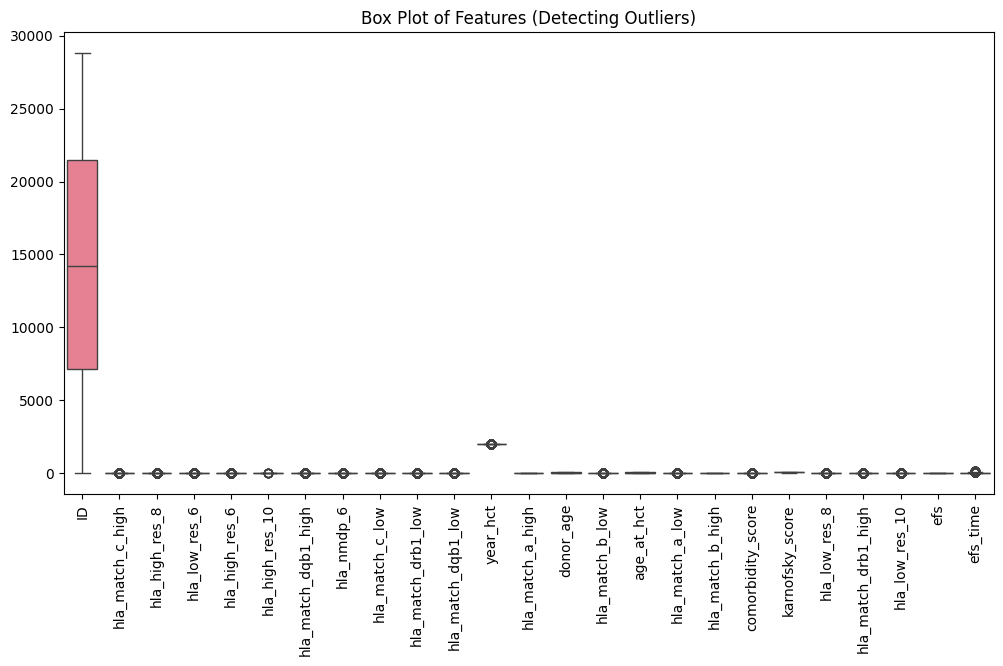

In [204]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.title("Box Plot of Features (Detecting Outliers)")
plt.show()


In [205]:
categorical_cols = train.select_dtypes(include=['object']).columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status',
       'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe',
       'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab',
       'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity',
       'obesity', 'in_vivo_tcd', 'hepatic_severe', 'prior_tumor',
       'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group',
       'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose',
       'cardiac', 'pulm_moderate'],
      dtype='object')
Numerical Columns: Index(['ID', 'hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6',
       'hla_high_res_6', 'hla_high_res_10', 'hla_match_dqb1_high',
       'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'donor_age',
       'hla_match_b_low', 'age_at_hct', 'hla_match_a_low', 'hla_match_b_high',
       'comorbidity_score'

In [206]:
label_encoder = LabelEncoder()

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])


In [207]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7237 entries, 1 to 28796
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      7237 non-null   int64  
 1   dri_score               7237 non-null   int64  
 2   psych_disturb           7237 non-null   int64  
 3   cyto_score              7237 non-null   int64  
 4   diabetes                7237 non-null   int64  
 5   hla_match_c_high        7237 non-null   float64
 6   hla_high_res_8          7237 non-null   float64
 7   tbi_status              7237 non-null   int64  
 8   arrhythmia              7237 non-null   int64  
 9   hla_low_res_6           7237 non-null   float64
 10  graft_type              7237 non-null   int64  
 11  vent_hist               7237 non-null   int64  
 12  renal_issue             7237 non-null   int64  
 13  pulm_severe             7237 non-null   int64  
 14  prim_disease_hct        7237 non-null   int6

In [208]:
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])


In [209]:
print("Final Processed Data:\n", train.head())
print("Missing Values:", train.isnull().sum().sum())  


Final Processed Data:
           ID  dri_score  psych_disturb  cyto_score  diabetes  \
1  -1.731064          2              0           1         0   
3  -1.730823          0              0           1         0   
5  -1.730581          0              0           5         2   
10 -1.729977          2              0           1         2   
22 -1.728527          7              2           5         0   

    hla_match_c_high  hla_high_res_8  tbi_status  arrhythmia  hla_low_res_6  \
1           0.494694        0.649170           6           0       0.613131   
3           0.494694        0.649170           0           0       0.613131   
5           0.494694       -0.033827           1           0      -1.151430   
10          0.494694        0.649170           0           0       0.613131   
22          0.494694        0.649170           0           0       0.613131   

    ...  tce_div_match  donor_related  melphalan_dose  hla_low_res_8  cardiac  \
1   ...              3              